#### Zad 1. Liczba próbek (w jednym okresie) sygnału rzeczywistego 𝑠(𝑡) = 𝑠𝑖𝑛(2𝜋𝑡) wynosi 𝑁, gdzie N jest potęgą 2

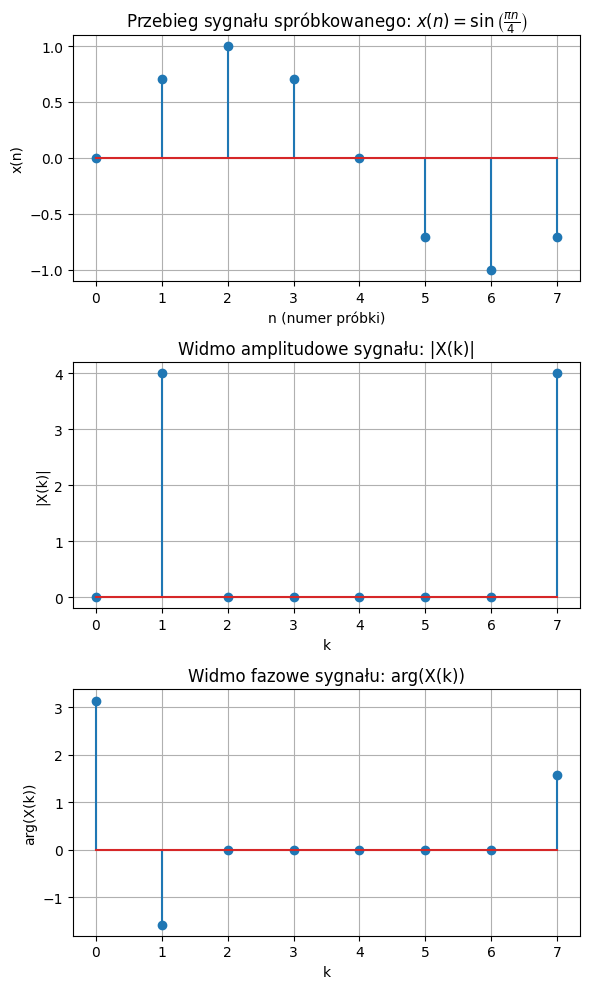

Parseval's theorem: Energy in the time domain is equal to the energy in the frequency domain.
Energy in the time domain: 4.0
Energy in the frequency domain: 4.0


In [9]:
# Zad 1a

"""
Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz
zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.
"""

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 8  # Number of samples
k_values = np.arange(N)  # From 0 to N-1
epsilon = 1e-10  # Threshold for the imaginary part of the DFT

# Sampled signal: s(t) = sin(2πt)
fs = 8
nT = np.arange(N) / fs  # n/fs
x_n = np.sin(2 * np.pi * nT)

# Compute the X(k) - DFT
X_k = np.zeros(N, dtype=complex)
for k in range(N):
    score = 0
    for n in range(N):
        score += np.sin(2 * np.pi * n / N) * np.exp(-1j * 2 * np.pi * k * n / N)

    # Remove the imaginary part if it is close to zero
    if abs(score.imag) < epsilon:
        score = score.real + 0j

    X_k[k] = score

# Compute the amplitude and phase of spectrum X(k)
amplitude_X_k = np.abs(X_k)
phase_X_k = np.angle(X_k)

# Graphs
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Plot samples of the signal x(n)
axs[0].stem(k_values, x_n)
axs[0].set_title(r"Przebieg sygnału spróbkowanego: $x(n) = \sin\left(\frac{\pi n}{4}\right)$")
axs[0].set_xlabel("n (numer próbki)")
axs[0].set_ylabel("x(n)")
axs[0].grid(True)

# Plot the amplitude of X(k)
axs[1].stem(k_values, amplitude_X_k)
axs[1].set_title("Widmo amplitudowe sygnału: |X(k)|")
axs[1].set_xlabel("k")
axs[1].set_ylabel("|X(k)|")
axs[1].grid(True)

# Plot the phase of X(k)
axs[2].stem(k_values, phase_X_k)
axs[2].set_title("Widmo fazowe sygnału: arg(X(k))")
axs[2].set_xlabel("k")
axs[2].set_ylabel("arg(X(k))")
axs[2].grid(True)

plt.tight_layout()
plt.savefig("Graphs/lab1_wyk1a.png")
plt.show()


# Energy in the time domain
energy_time = np.sum(np.abs(x_n)**2)

# Energy in the frequency domain (according to Parseval's theorem)
energy_freq = round((1/N) * np.sum(np.abs(X_k)**2), 3)

print("Parseval's theorem: Energy in the time domain is equal to the energy in the frequency domain.")
print("Energy in the time domain:", energy_time)
print("Energy in the frequency domain:", energy_freq)

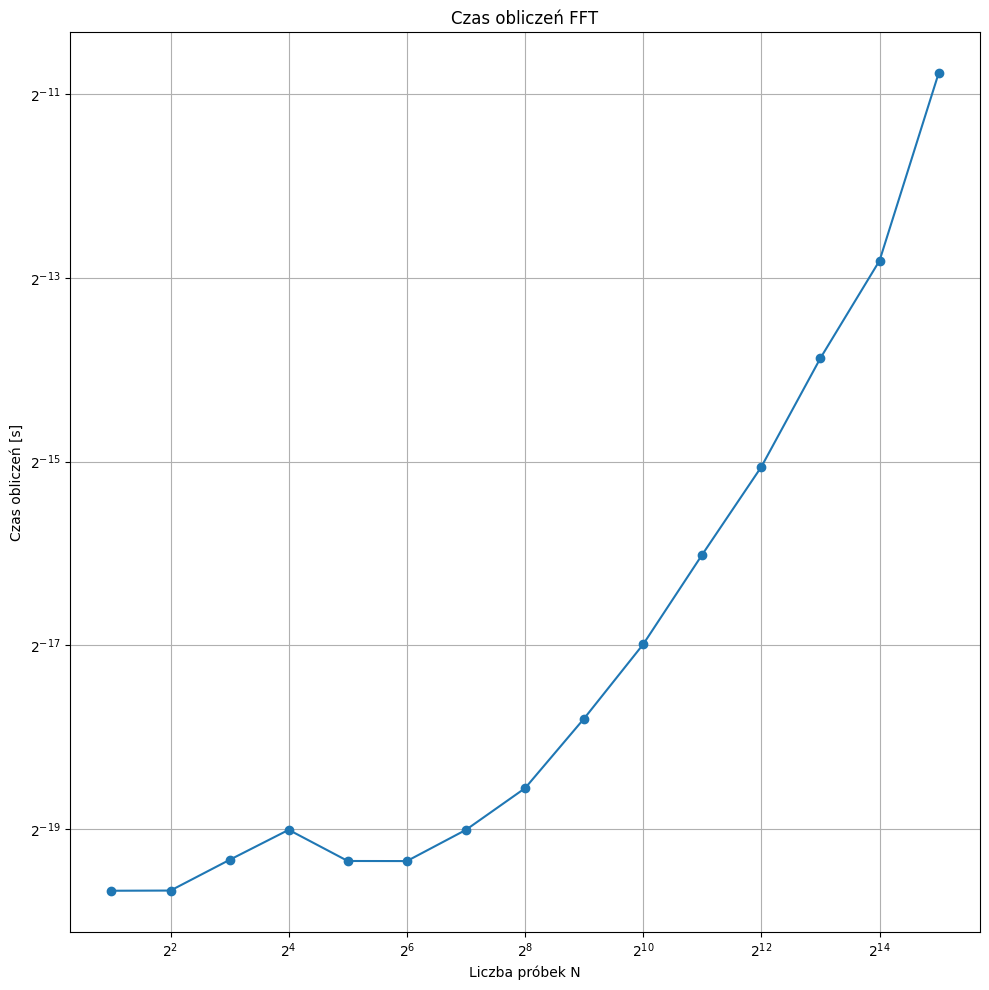

'\nWnioski:\nKształt otrzymanego wykresu jest zgodny z teoretyczną złożonością\nobliczeniową algorytmu FFT, która wynosi: O(NlogN)\n'

In [ ]:
# Zad 1b

"""
Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą
algorytmu FFT w funkcji liczby próbek N = 2^l, l ∈ N . Dobrać samodzielnie wartości N.
Skomentować kształt otrzymanego wykresu odnosząc się do teoretycznej złożoności obliczeniowej
algorytmu FFT.
"""

import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
l_values = np.arange(1, 16)
N_values = 2**l_values
times_fft = []

# FFT time measurement for different signal lengths
for N in N_values:
    n = np.arange(N)
    x_n = np.sin(2 * np.pi * n / N)
    
    if N < 2**16:
        iterations = 10000
    else:
        iterations = 1
        
    start_time = time.time()
    for i in range(iterations):
        np.fft.fft(x_n)
    elapsed_time = time.time() - start_time
    times_fft.append(elapsed_time/iterations)

# Plot the results
plt.figure(figsize=(10, 10))
plt.plot(N_values, times_fft, 'o-')
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlabel('Liczba próbek N')
plt.ylabel('Czas obliczeń [s]')
plt.title('Czas obliczeń FFT')
plt.grid(True, which='both')
plt.tight_layout()
plt.savefig('Graphs/lab1_wyk1b.png')
plt.show()

"""
Wnioski:
Kształt otrzymanego wykresu jest zgodny z teoretyczną złożonością
obliczeniową algorytmu FFT, która wynosi: O(NlogN)
"""

#### Zad. 2

'\nWnioski:\nWidmo amplitudowe pomimo przesunięć pozostaje bez zmian natomiast widmo fazowe ulega zmianie. \nJest to obserwacja zgodna z własnością przesunięcia w czasie DFT z wykładu 4. \n'

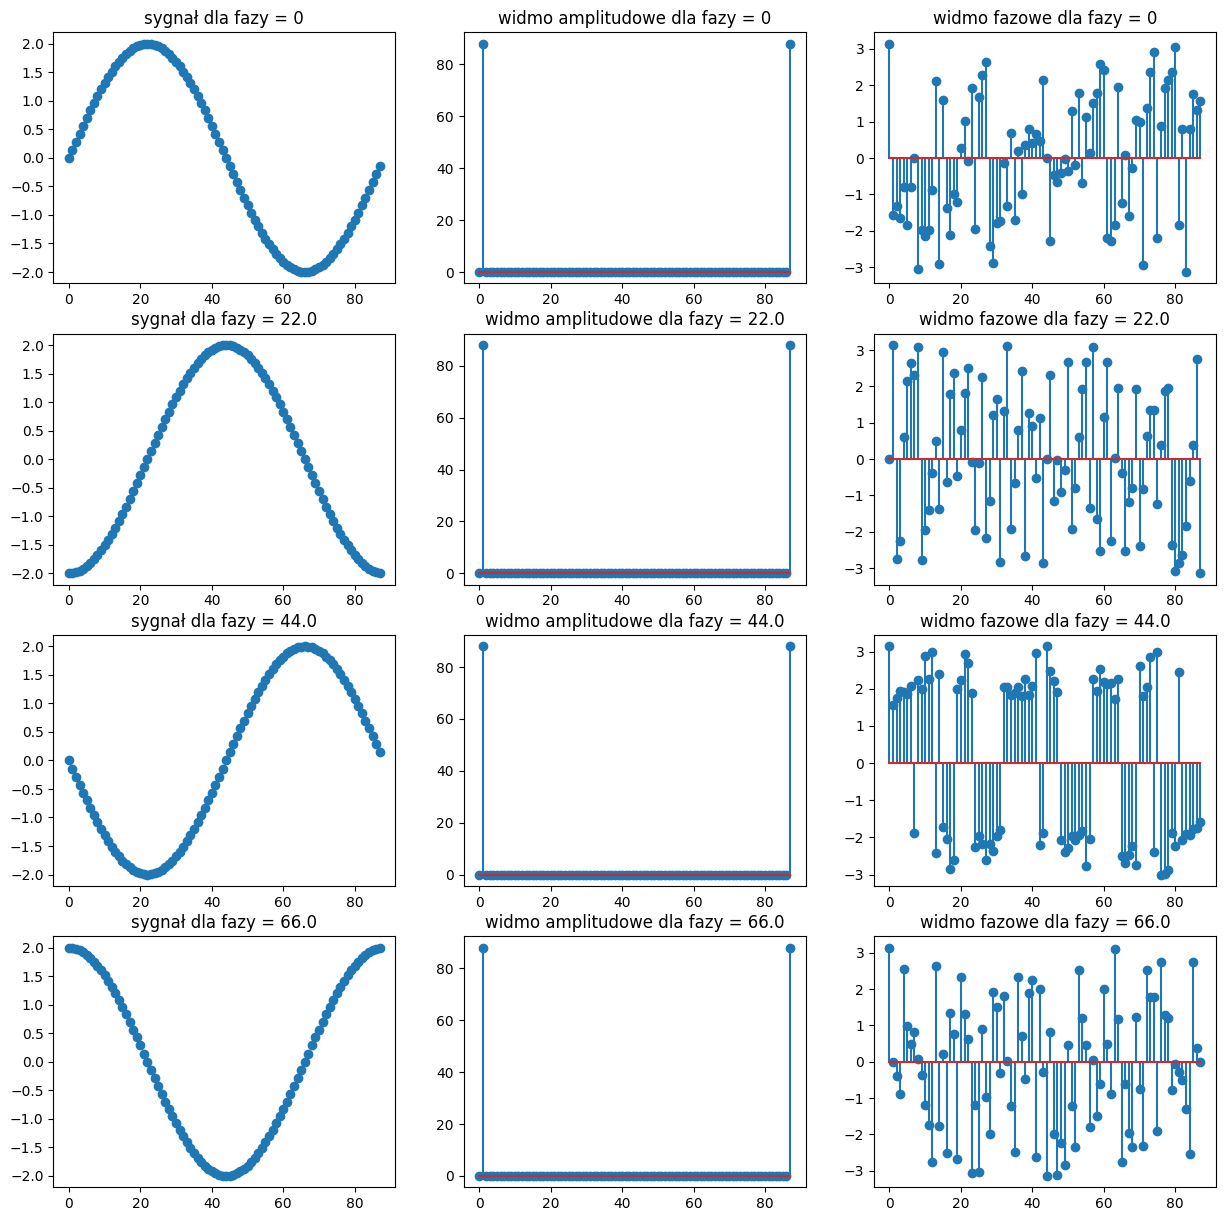

In [6]:
# Zad 2

'''
. Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego
sygnału harmonicznego 𝑠[𝑛] = 𝐴 𝑠𝑖𝑛 (2𝜋𝑛/𝑁) o amplitudzie 𝐴 = 2 i okresie podstawowym 𝑁 = 88.
W tym celu dla każdej wartości 𝑛0 ∈ {0, 𝑁/4 , 𝑁/2 , 3𝑁/4 } wykreślić widmo amplitudowe i fazowe
przesuniętego sygnału 𝑠[𝑛 − 𝑛0]𝑁. Skomentować otrzymane wyniki
'''
A = 2
N = 88

from math import sin, pi
import numpy as np
from numpy.fft import fft

import matplotlib.pyplot as plt

def s(n, phase):
    return A*sin(2*pi*(n-phase)/N)




phases = [0, N/4, N/2, 3*N/4]
fig, axs = plt.subplots(len(phases), 3, squeeze=False, figsize=(15,15))
samples_x = np.arange(0, N, 1)
for phase_i, phase in enumerate(phases):
    
    samples = []
    for n in samples_x:
        samples.append(s(n, phase))


    dft = fft(samples)

    ax = axs[phase_i][0]
    ax.scatter(samples_x, samples)
    ax.set_title(f"sygnał dla fazy = {phase}")
    ax = axs[phase_i][1]
    ax.stem(samples_x, np.abs(dft), use_line_collection=True)
    ax.set_title(f"widmo amplitudowe dla fazy = {phase}")
    ax = axs[phase_i][2]
    ax.set_title(f"widmo fazowe dla fazy = {phase}")
    ax.stem(samples_x, np.angle(dft))
    
'''
Wnioski:
Widmo amplitudowe pomimo przesunięć pozostaje bez zmian natomiast widmo fazowe ulega zmianie. 
Jest to obserwacja zgodna z własnością przesunięcia w czasie DFT z wykładu 4. 
'''

#### Zad. 3

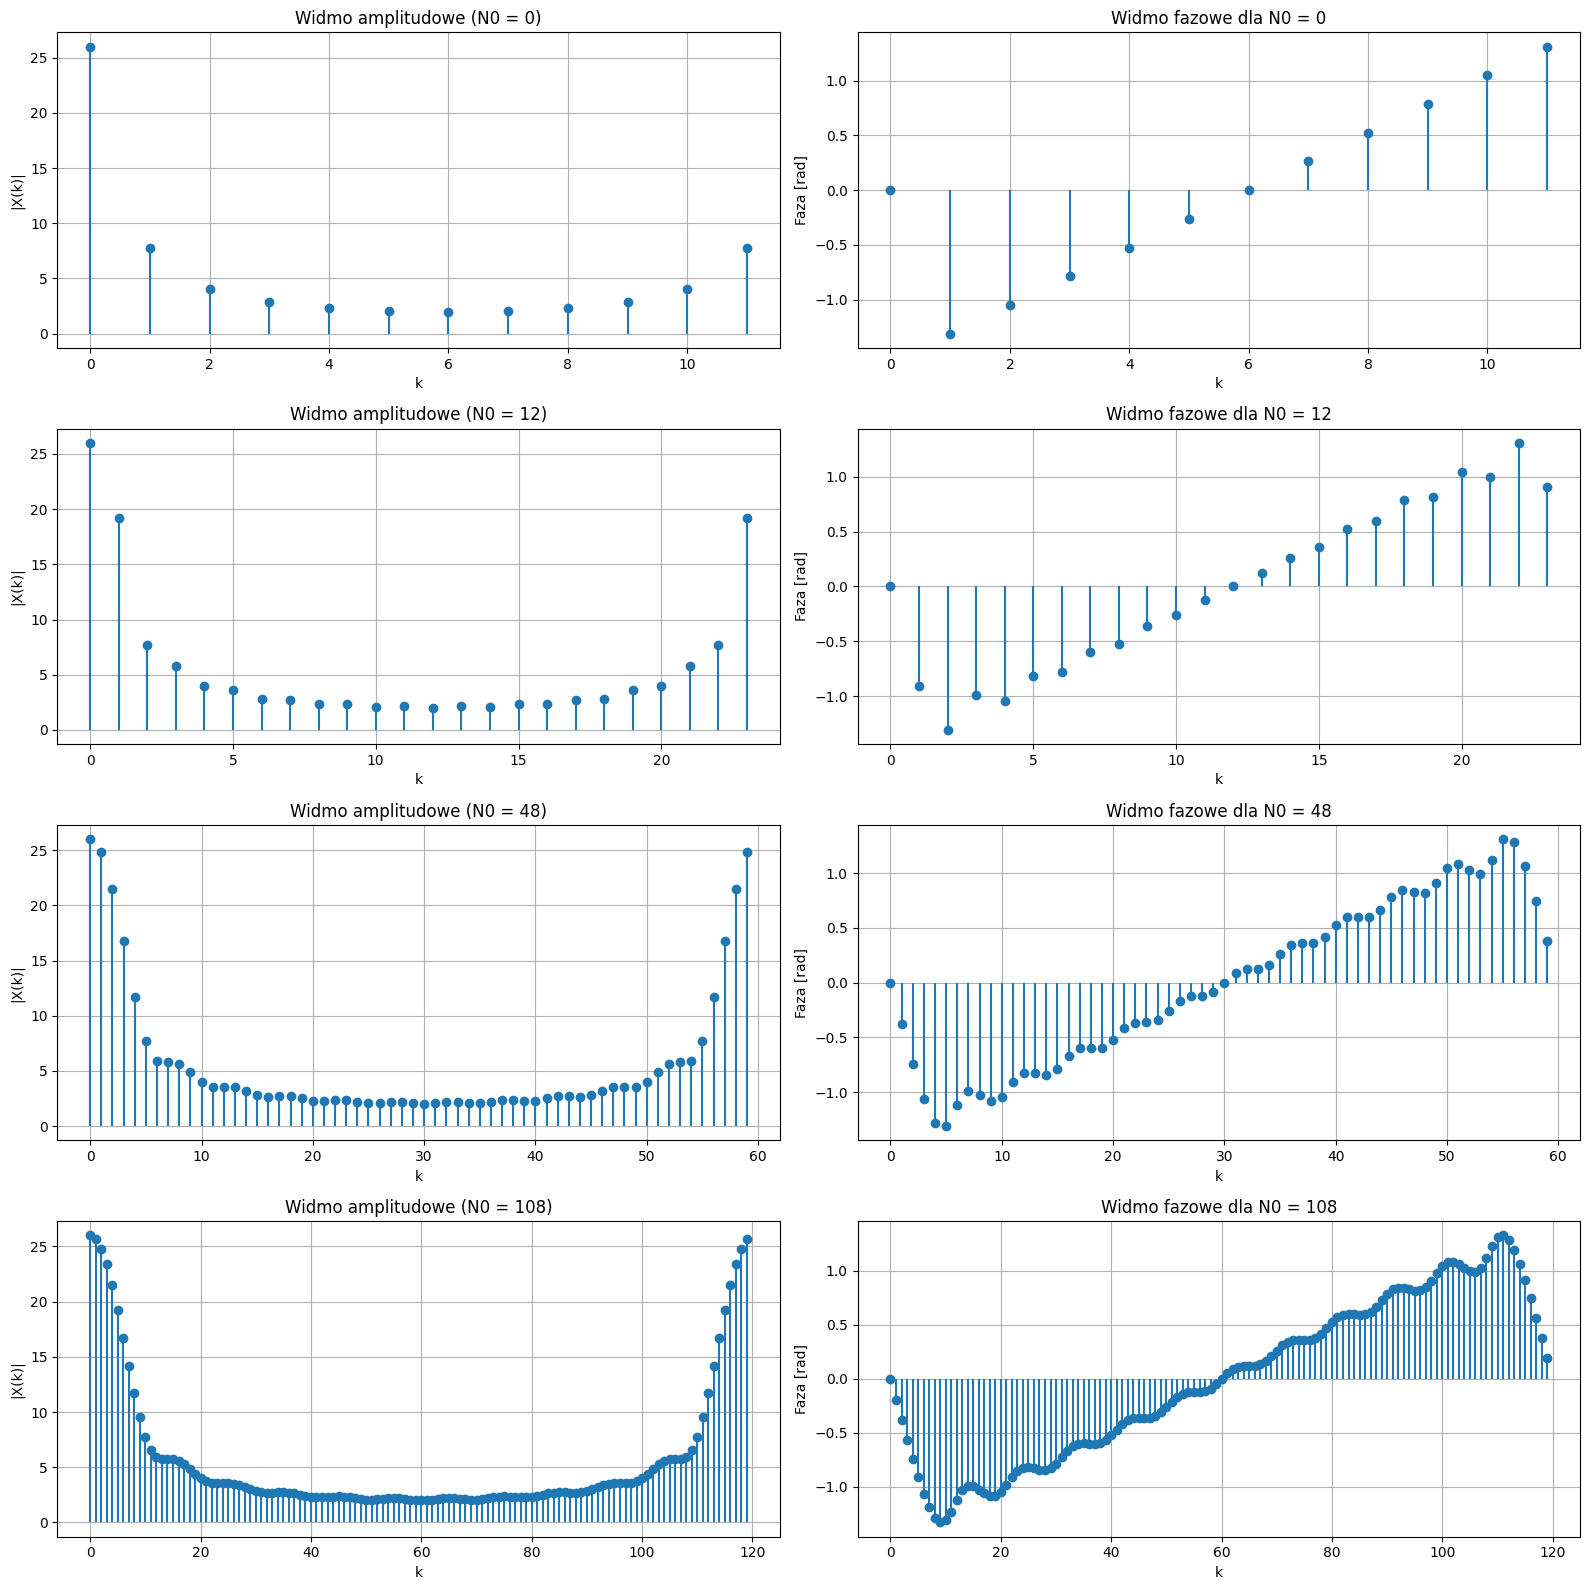

'\nWnioski:\nWraz ze zwrostem dopełninia zermi charakterystyka widma amplitudowego\noraz fazowego sygnału jest niezmienna.\nJednakże zwiększa się liczba próbek, co pozwala na dokładniejsze zbadanie sygnału,\npoprzez dodatkowe punkty pośrednie.\n'

In [ ]:
# Zad 3

"""
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego
sygnału s[n] = A (1 - (n % N) / N) o amplitudzie A = 4 i okresie podstawowym N = 12. W tym celu dla
każdej wartości N0 ∈ {0,1N, 4N, 9N} wykreślić widmo amplitudowe i fazowe sygnału s[n]
dopełnionego N0 zerami. Skomentować otrzymane wyniki.
"""

import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 4
N = 12
N0_values = [0, N, 4*N, 9*N]

def generate_signal(A, N, N0):
    n = np.arange(N)
    n = A * (1 - (n % N) / N)
    return np.concatenate((n, np.zeros(N0)))

# Plot graphs
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
grpahs_no = 0
for N0 in N0_values:
    x_n = generate_signal(A, N, N0)
    X_k = np.fft.fft(x_n)
    
    amplitude = np.abs(X_k)
    phase = np.angle(X_k)
    freq = np.arange(len(X_k))

    
    # Amplitude spectrum
    axs[grpahs_no][0].stem(freq, amplitude, basefmt=" ")
    axs[grpahs_no][0].set_title(f"Widmo amplitudowe (N0 = {N0})")
    axs[grpahs_no][0].set_xlabel("k")
    axs[grpahs_no][0].set_ylabel("|X(k)|")
    axs[grpahs_no][0].grid(True)

    # Phase spectrum
    axs[grpahs_no][1].stem(freq, phase, basefmt=" ")
    axs[grpahs_no][1].set_title(f"Widmo fazowe dla N0 = {N0}")
    axs[grpahs_no][1].set_xlabel("k")
    axs[grpahs_no][1].set_ylabel("Faza [rad]")
    axs[grpahs_no][1].grid(True)

    grpahs_no += 1

plt.tight_layout()
plt.savefig("Graphs/lab1_wyk3.png")
plt.show()

"""
Wnioski:
Wraz ze zwrostem dopełninia zermi charakterystyka widma amplitudowego
oraz fazowego sygnału jest niezmienna.
Jednakże zwiększa się liczba próbek, co pozwala na dokładniejsze zbadanie sygnału,
poprzez dodatkowe punkty pośrednie.
"""


#### Zad. 4

'\nTak, dochodzi do zjawiska przecieku widma ponieważ zamiast prostych kresek w spodziewanych częstotliwościach \nmamy jeszcze "rozlewanie" się mocy wokół spodziewanych częstotliwości. \nZwiększenie ilości próbek pozytywnie wpływa na redukcję przecieku widma, ponieważ wydłużamy czas obserwacji sygnału.\nZjawisko zapewne wtedy też występuje, ale jest o wiele mniej zauważalne.\n'

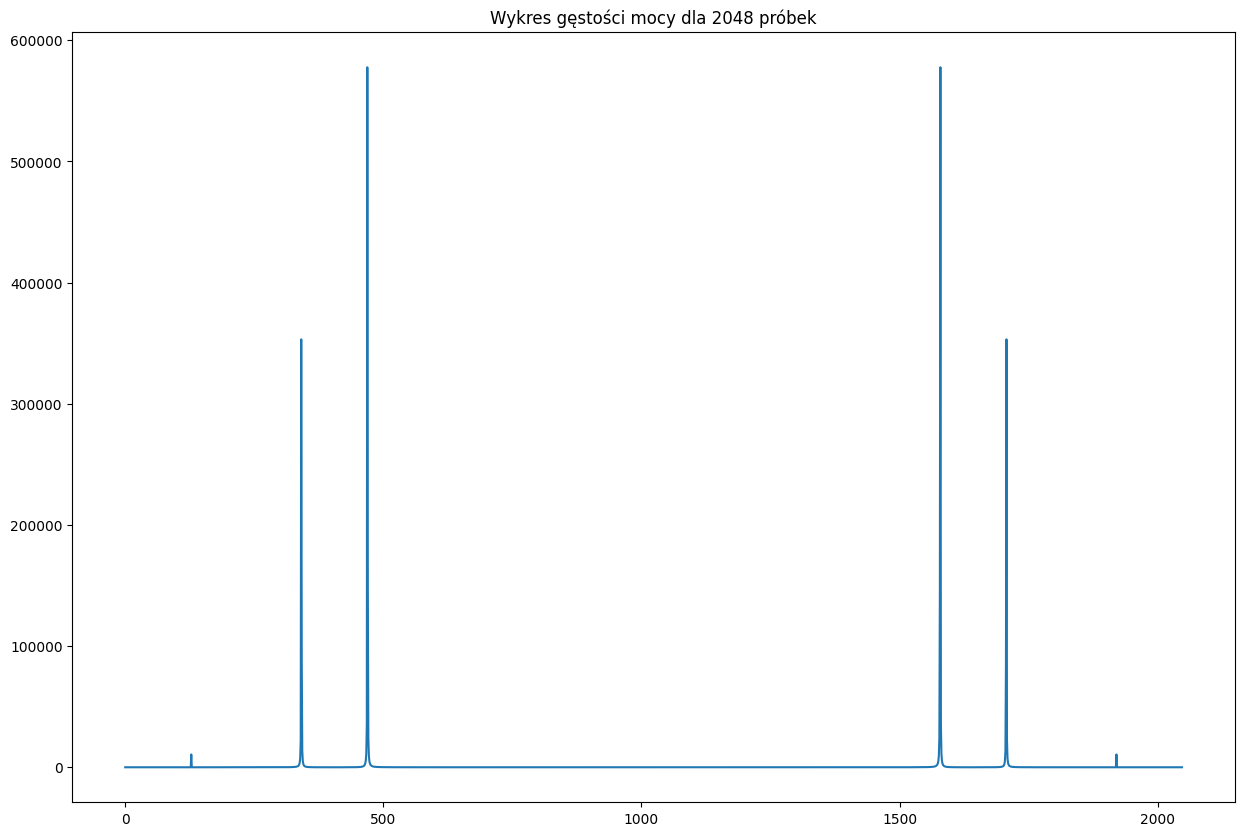

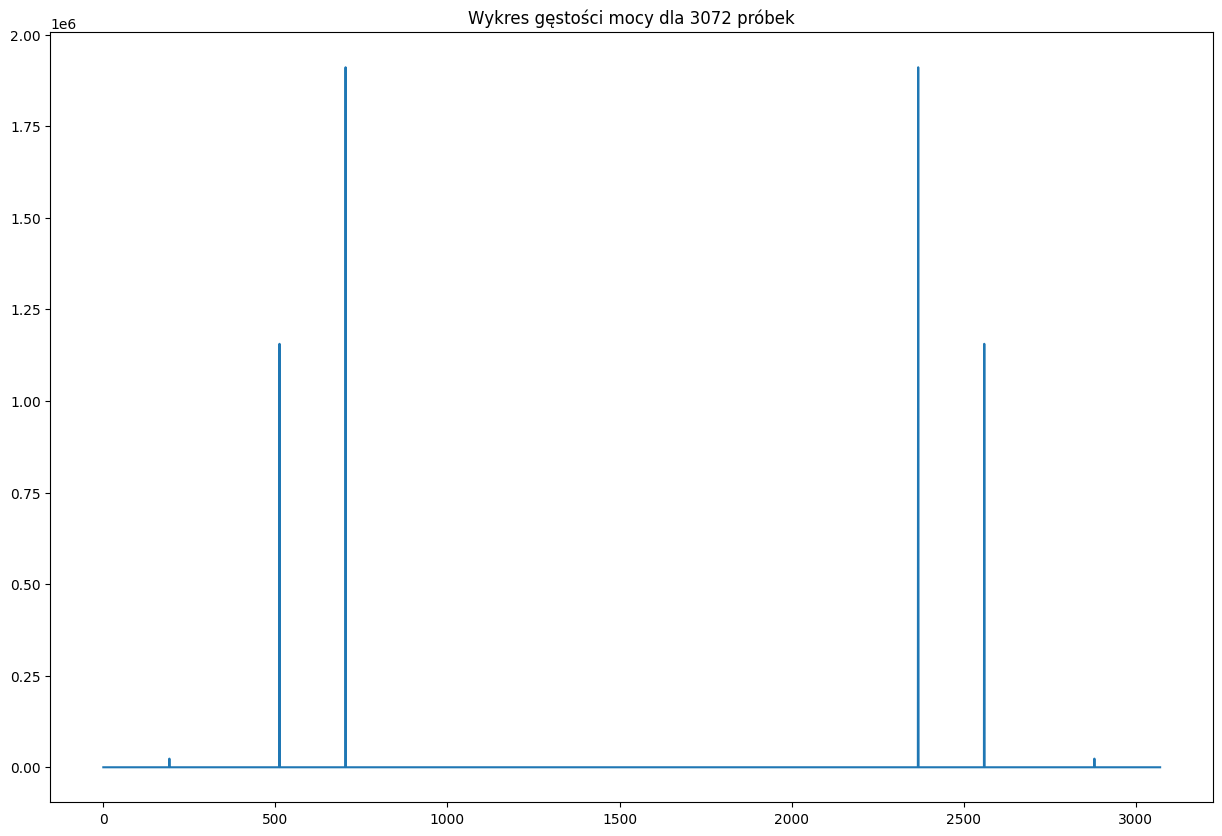

In [8]:
# Zad. 4
'''
Dany jest sygnał rzeczywisty s(t) = A1 sin(2πf_1 *t) + A2 sin(2πf_2*t) + A3 sin(2πf_3*t) , gdzie A1 =
0.1 , f1 = 3000 Hz, A2 = 0.7 , f2 = 8000 Hz, A3 = 0.9 , f3 = 11000 Hz. Przy założeniu, że
częstotliwość próbkowania wynosi fs = 48000 Hz, a liczba próbek sygnału wynosi N1 = 2048 ,
przedstawić wykres widmowej gęstości mocy sygnału spróbkowanego. Czy dla podanej liczby próbek
mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja uległaby zmianie dla liczby próbek
N2 = 3/2 N1 ? Odpowiedź uzasadnić.
'''
from math import sin, pi
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

A1 = 0.1
f1 = 3000
A2 = 0.7
f2 = 8000
A3 = 0.9
f3 = 11000

fs = 48000
N1 = 2048
N2 = int(3/2 * N1)

def s(t):
    return A1 * sin(2*pi*f1*t) + A2 * sin(2*pi*f2*t) + A3 * sin(2*pi*f3*t)

def get_samples(N):
    sampling_time = 1/fs
    samples = []
    time = 0
    for n in range(N):
        sample = s(time)
        samples.append(sample)
        time += sampling_time
    return samples

samples_n1 = get_samples(N1)
samples_n2 = get_samples(N2)

def calc_density_spectrum(samples):
    dft = fft(samples)
    density_spectrum = np.abs(dft)
    density_spectrum = np.power(density_spectrum, 2)
    return density_spectrum

density_spectrum_n1 = calc_density_spectrum(samples_n1)
density_spectrum_n2 = calc_density_spectrum(samples_n2)

plt.figure(figsize=(15, 10))
plt.plot(density_spectrum_n1)
plt.title(f"Wykres gęstości mocy dla {N1} próbek")

plt.figure(figsize=(15, 10))
plt.plot(density_spectrum_n2)
plt.title(f"Wykres gęstości mocy dla {N2} próbek")

'''
Tak, dochodzi do zjawiska przecieku widma ponieważ zamiast prostych kresek w spodziewanych częstotliwościach 
mamy jeszcze "rozlewanie" się mocy wokół spodziewanych częstotliwości. 
Zwiększenie ilości próbek pozytywnie wpływa na redukcję przecieku widma, ponieważ wydłużamy czas obserwacji sygnału.
Zjawisko zapewne wtedy też występuje, ale jest o wiele mniej zauważalne.
'''
